## Monte Carlo Simulations of Avacado Demand

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

sns.set_style('whitegrid')

In [23]:
pwd

'/home/pinkmonkey/Documents/Blogs'

In [24]:
df = pd.read_csv("/home/pinkmonkey/Downloads/Kaggle_datasets/Avacado/avocado.csv")
df = df.drop(['4046','4225','4770','Total Bags','Small Bags', 'Large Bags', 'XLarge Bags','type', 'year', 'region'], axis=1)
df.head()
#df.shape

,Unnamed: 0,Date,AveragePrice,Total Volume
0,0,2015-12-27,1.33,64236.62
1,1,2015-12-20,1.35,54876.98
2,2,2015-12-13,0.93,118220.22
3,3,2015-12-06,1.08,78992.15
4,4,2015-11-29,1.28,51039.60


In [25]:
df['Demand'] = df['AveragePrice'] * df['Total Volume']

In [26]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,Demand
0,0,2015-12-27,1.33,64236.62,85434.7046
1,1,2015-12-20,1.35,54876.98,74083.9230
2,2,2015-12-13,0.93,118220.22,109944.8046
3,3,2015-12-06,1.08,78992.15,85311.5220
4,4,2015-11-29,1.28,51039.60,65330.6880


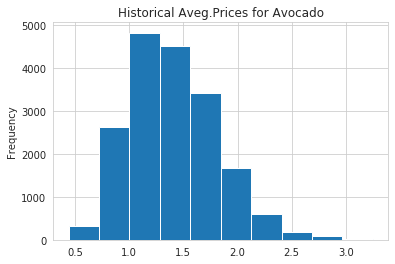

In [32]:
# Simple histogram to confirm distribution 
df['AveragePrice'].plot(kind='hist', title='Historical Aveg.Prices for Avocado');

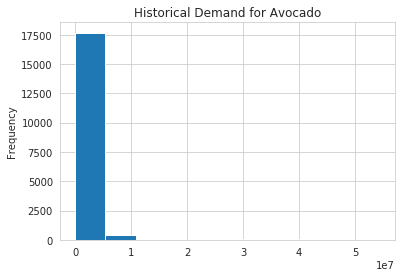

In [33]:
# Simple histogram to confirm distribution 
df['Demand'].plot(kind='hist', title='Historical Demand for Avocado');